# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/weather_data.csv"

# Full range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [38]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

In [52]:
len(cities)

601

In [32]:
test = ['hi', 'bye']
test.index('hi')

0

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [48]:
api_call = f"http://api.openweathermap.org/data/2.5/weather?q=jamestown&units=imperial&appid={weather_api_key}"
weather_response = requests.get(api_call).json()

print(json.dumps(weather_response, indent =4 , sort_keys = True))

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 42.097,
        "lon": -79.2353
    },
    "dt": 1619475571,
    "id": 5122534,
    "main": {
        "feels_like": 46.35,
        "humidity": 40,
        "pressure": 1020,
        "temp": 49.26,
        "temp_max": 52,
        "temp_min": 46.99
    },
    "name": "Jamestown",
    "sys": {
        "country": "US",
        "id": 4588,
        "sunrise": 1619432346,
        "sunset": 1619482198,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 6.91
    }
}


In [54]:
# Initialize lists to hold data from API call 
found_cities = []
lats = []
lngs = []
temps = []
hum = []
clouds = []
winds = []
countries = []
dates = []

for city in cities:
    api_call = f"http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}"
    weather_response = requests.get(api_call).json()
    if weather_response['cod'] == 200:
        lats.append(weather_response['coord']['lat'])
        lngs.append(weather_response['coord']['lon'])
        hum.append(weather_response['main']['humidity'])
        temps.append(weather_response['main']['temp'])
        clouds.append(weather_response['clouds']['all'])
        winds.append(weather_response['wind']['speed'])
        countries.append(weather_response['sys']['country'])
        dates.append(weather_response['dt'])
        found_cities.append(city)
        print(f"Retrieving data for city #{cities.index(city)+1} | {city}")
    else:
        print(f"Could not find {city}. Skipping.")



Retrieving data for city #1 | jonesboro
Retrieving data for city #2 | tambilil
Retrieving data for city #3 | alice springs
Retrieving data for city #4 | ponta do sol
Retrieving data for city #5 | punta arenas
Retrieving data for city #6 | bambous virieux
Retrieving data for city #7 | ancud
Retrieving data for city #8 | mancio lima
Retrieving data for city #9 | tuktoyaktuk
Retrieving data for city #10 | timmins
Retrieving data for city #11 | santa ines
Retrieving data for city #12 | ushuaia
Could not find taolanaro. Skipping.
Retrieving data for city #14 | berlevag
Retrieving data for city #15 | buenos aires
Retrieving data for city #16 | kununurra
Retrieving data for city #17 | mattru
Retrieving data for city #18 | mayo
Retrieving data for city #19 | price
Retrieving data for city #20 | nome
Retrieving data for city #21 | qaanaaq
Could not find nguiu. Skipping.
Could not find mys shmidta. Skipping.
Retrieving data for city #24 | new norfolk
Retrieving data for city #25 | manta
Retrievi

Could not find bengkalis. Skipping.
Retrieving data for city #206 | coquimbo
Retrieving data for city #207 | chokurdakh
Retrieving data for city #208 | verkhoyansk
Retrieving data for city #209 | valvedditturai
Retrieving data for city #210 | bengkulu
Retrieving data for city #211 | san jose
Retrieving data for city #212 | mahebourg
Retrieving data for city #213 | leh
Retrieving data for city #214 | vestmannaeyjar
Retrieving data for city #215 | nanortalik
Retrieving data for city #216 | abu samrah
Retrieving data for city #217 | mananara
Retrieving data for city #218 | acapulco
Retrieving data for city #219 | ormara
Retrieving data for city #220 | margate
Retrieving data for city #221 | rio grande
Retrieving data for city #222 | puerto ayora
Retrieving data for city #223 | yumaguzino
Retrieving data for city #224 | kendari
Retrieving data for city #225 | houma
Retrieving data for city #226 | kasempa
Retrieving data for city #227 | lorengau
Retrieving data for city #228 | faanui
Retrie

Retrieving data for city #406 | sao jose da coroa grande
Could not find marcona. Skipping.
Retrieving data for city #408 | pangnirtung
Retrieving data for city #409 | harper
Retrieving data for city #410 | makakilo city
Retrieving data for city #411 | huaral
Retrieving data for city #412 | san rafael
Retrieving data for city #413 | vila velha
Retrieving data for city #414 | illapel
Retrieving data for city #415 | shizunai
Retrieving data for city #416 | cabedelo
Retrieving data for city #417 | edendale
Retrieving data for city #418 | marawi
Retrieving data for city #419 | bundaberg
Retrieving data for city #420 | filingue
Retrieving data for city #421 | colares
Retrieving data for city #422 | nadym
Retrieving data for city #423 | ketchikan
Retrieving data for city #424 | porto novo
Retrieving data for city #425 | tibati
Retrieving data for city #426 | anadyr
Retrieving data for city #427 | lashio
Retrieving data for city #428 | bonavista
Retrieving data for city #429 | tutoia
Retrievin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [61]:
# Creating dataframe 
weather_df = pd.DataFrame({"City" : found_cities,
                           "Lat" : lats, 
                           "Lng" : lngs, 
                           "Temperature" : temps, 
                           "Humidity" : hum,
                           "Cloudiness" : clouds,
                           "Wind_Speed" : winds,
                           "Country" : countries, 
                           "Date" : dates
                           })
weather_df.index.name = "index"


In [62]:
# Displaying dataframe
weather_df.head()

,City,Lat,Lng,Temperature,Humidity,Cloudiness,Wind_Speed,Country,Date
index,,,,,,,,,
0,jonesboro,35.8423,-90.7043,78.03,41,1,19.57,US,1619477469
1,tambilil,5.9622,124.6697,81.30,78,93,2.55,PH,1619477480
2,alice springs,-23.7000,133.8833,53.60,50,0,3.44,AU,1619477481
3,ponta do sol,32.6667,-17.1000,56.21,78,78,1.01,PT,1619477212
4,punta arenas,-53.1500,-70.9167,44.29,93,90,5.75,CL,1619476936


In [63]:
# Exporting data into csv file
weather_df.to_csv(output_data_file, index = True, header = True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [68]:
weather_df.loc[weather_df.Humidity >100, :]

,City,Lat,Lng,Temperature,Humidity,Cloudiness,Wind_Speed,Country,Date
index,,,,,,,,,


There are no cities with humidity > 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

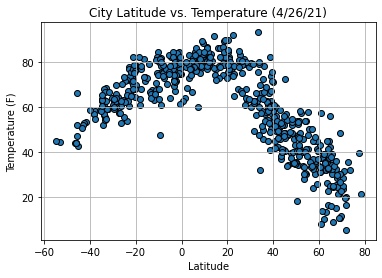

In [80]:
# Scatter plot for latitude vs temp
lat_temp = plt.scatter(weather_df.Lat, weather_df.Temperature, edgecolors = 'black')
plt.title("City Latitude vs. Temperature (4/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)
plt.show()

## Latitude vs. Humidity Plot

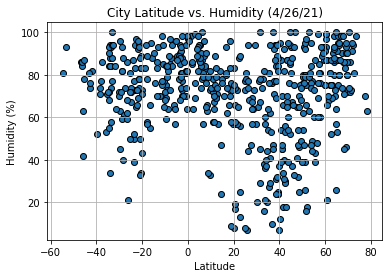

In [77]:
# Scatter plot for latitude vs humidity
plt.scatter(weather_df.Lat, weather_df.Humidity, edgecolors = 'black')
plt.title("City Latitude vs. Humidity (4/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.show()

## Latitude vs. Cloudiness Plot

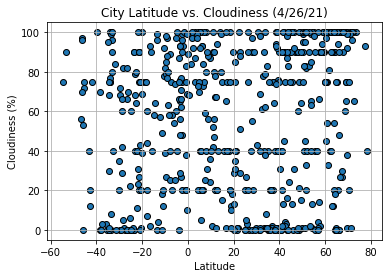

In [78]:
# Scatter plot for latitude vs cloudiness
plt.scatter(weather_df.Lat, weather_df.Cloudiness, edgecolors = 'black')
plt.title("City Latitude vs. Cloudiness (4/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.show()

## Latitude vs. Wind Speed Plot

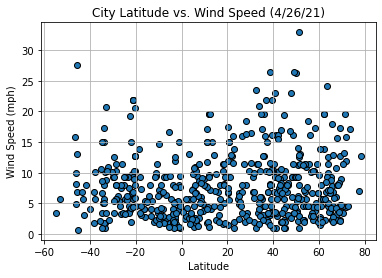

In [79]:
# Scatter plot for latitude vs wind speed
plt.scatter(weather_df.Lat, weather_df.Wind_Speed, edgecolors = 'black')
plt.title("City Latitude vs. Wind Speed (4/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.show()

## Linear Regression

In [84]:
# Define function to run linear regression.
def lin_regress(independent, dependent, data): 
    # Use scipy to calculate values for regression
    ind = data[independent]
    dep = data[dep]
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(ind, dep)

    # Calculate the regression values
    regress_vals = ind*slope + intercept

    # Create string variable that holds the regression line's equation
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    # Plot regression line on top of scatter plot

    plt.plot(ind, regress_vals, color = "r", label = line_eq)
    plt.legend(loc = "best")
    print(f"The correlation coefficient is {round(rvalue, 2)}")
    print(f"The r-squared value is {round(rvalue**2,2)}")

AttributeError: 'PathCollection' object has no attribute 'show'

####  Northern Hemisphere - Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


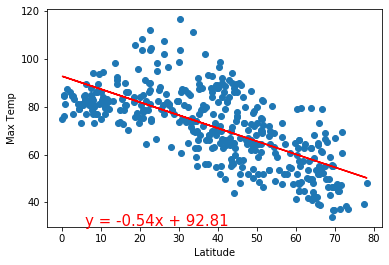

####  Southern Hemisphere - Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


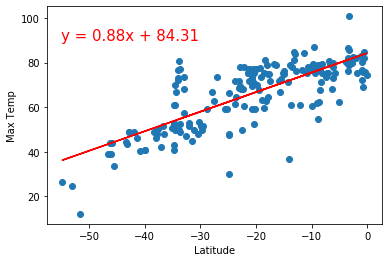

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


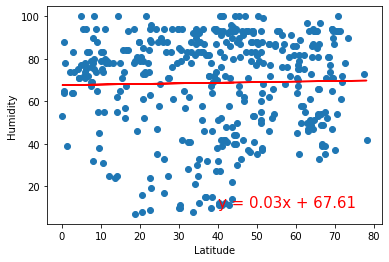

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


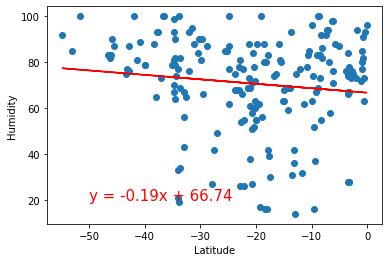

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


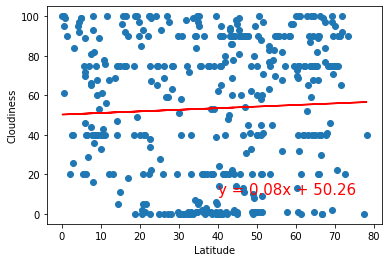

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


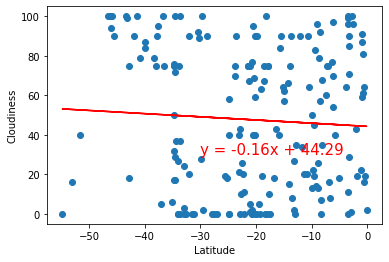

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


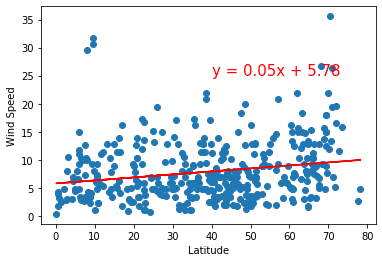

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


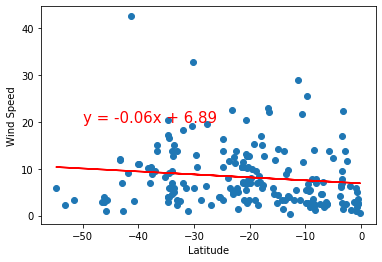